<a href="https://colab.research.google.com/github/Tony14100/portfolio/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D0%BE%D0%B3%D0%BE_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0_%D0%BD%D0%B0_%D0%B4%D0%BE%D1%81%D0%BA%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install inference
!pip install supervision

In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="# ключ робофлоу")
project = rf.workspace("university-of-peshawar-4qet5").project("new-dataset-xjgtk")
version = project.version(8)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to new-Dataset-8 in yolov8:: 100%|██████████| 8400/8400 [00:01<00:00, 4852.32it/s]


In [ ]:
from inference.models.utils import get_model

model = get_model(model_id="new-dataset-xjgtk/5", api_key="")

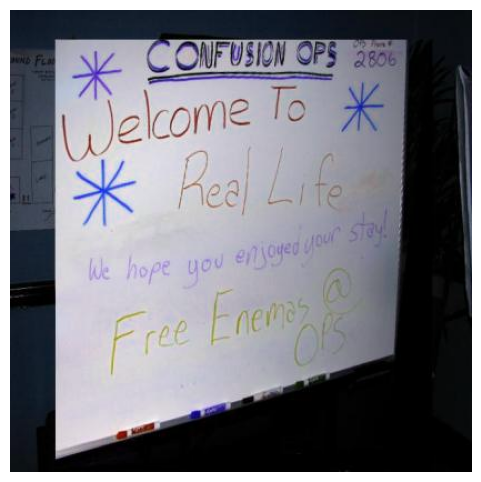

In [ ]:
from skimage import io
import numpy as np
import supervision as sv

# Image Link
IMAGE_LINK = "/content/new-Dataset-8/test/images/00fd7896b0b67f93_jpg.rf.bff4c5a9146834c66feeb9e5386f0bc1.jpg"

# Get Image
image = io.imread(IMAGE_LINK)

# Display Image
sv.plot_image(image, (6,6))

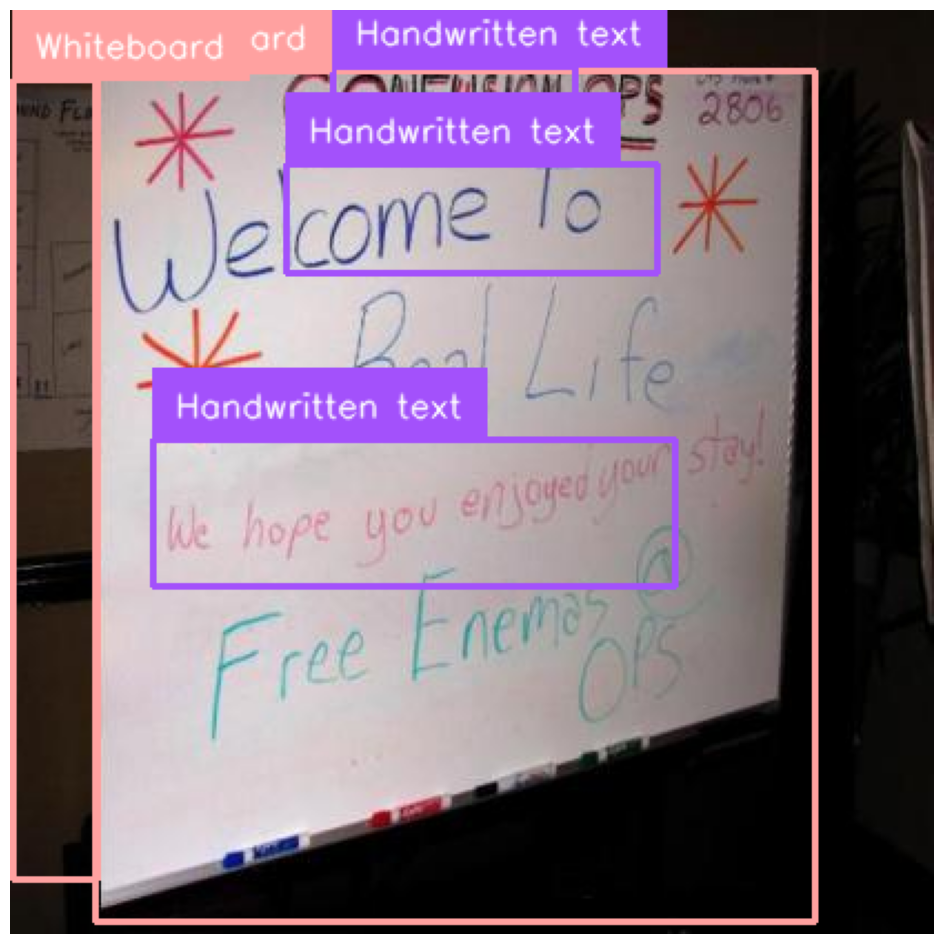

In [ ]:
# import a utility function for loading Roboflow models
from inference import get_model
# import supervision to visualize our results
import supervision as sv
# import cv2 to helo load our image
import cv2

# define the image url to use for inference
image_file = "/content/new-Dataset-8/test/images/00fd7896b0b67f93_jpg.rf.bff4c5a9146834c66feeb9e5386f0bc1.jpg"
image = cv2.imread(image_file)

# load a pre-trained yolov8n model


# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results[0].dict(by_alias=True, exclude_none=True))

# create supervision annotators
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)